In [1]:
from agents import Producer, Consumer, Influencer
from content_market import ContentMarket
import numpy as np
from test import test

In [2]:
topics = np.array([[1, 10]])

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [4]:
varied_param = 'consumer_external_interest_prob'
varied_param_legend_label = 'External Interest'
varied_param_x_label = 'Consumer External Interest Probability'

In [5]:
num_producers = 6
num_influencers = 1
num_consumers = 5

In [6]:
external_interest_probs = list(np.linspace(0, 1, 11))

In [7]:
stats, markets, tests = test(
    topics=topics,
    varied_param=varied_param,
    num_producers=num_producers,
    num_consumers=num_consumers,
    num_influencers=num_influencers,
    producer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=external_interest_probs,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    producer_type=Producer,
    consumer_type=Consumer,
    influencer_type=Influencer,
)

Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 0 / 100 done.
Total Social Welfare: 46.530291949762514
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 1 / 100 done.
Total Social Welfare: 46.96970428061613
Consumer rate change: 0.10026097036805429
Consumer utility change: 0.04896942104007085
Influencer rate change: 0.10362431587480177
Influencer utility change: 0.18930727227432698
Producer topic change: 0.005535498886077332
Producer utility change: 0.0008763255631558664
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9


In [8]:
print(stats)

{'total_social_welfare': [[0, 46.530291949762514, 46.96970428061613, 46.971373023483245, 46.97138849266443], [0, 46.53029412426863, 46.969704463328476, 46.971373223804, 46.97138871755032], [0, 46.53029144582108, 46.96970435989889, 46.97137275683873, 46.971388265261076], [0, 46.23064217223633, 46.66706574732585, 46.668630321962446, 46.66865282127847], [0, 45.780242842355115, 46.232311985735464, 46.234455266058056, 46.23448880515763], [0, 45.68996671089587, 46.13553368832342, 46.137900111900095, 46.137916175844445, 46.1379164976989], [0, 45.907833361818476, 46.33644694724637, 46.33842362885106, 46.338447765015054, 46.338448139803596], [0, 45.96337164742999, 46.390265484296435, 46.3922754066713, 46.39230407914599], [0, 46.05171178138394, 46.47718597520184, 46.47925180324142, 46.47928488267515], [0, 46.165676644842925, 46.58990626526886, 46.592004429455216, 46.592044024214545], [0, 46.30047166225494, 46.72356110140948, 46.72570453914135, 46.72574997585667]], 'average_agent_utilities': [[0,

In [9]:
print(tests)

{'consumer_external_interest_prob': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]}


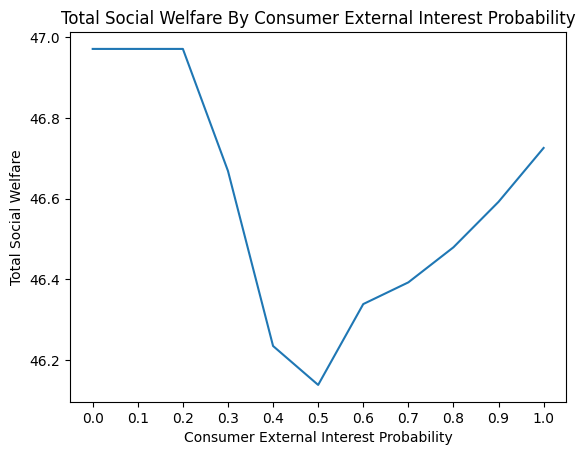

In [10]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", stats['total_social_welfare'], tests[varied_param], varied_param_x_label, 'Total Social Welfare')

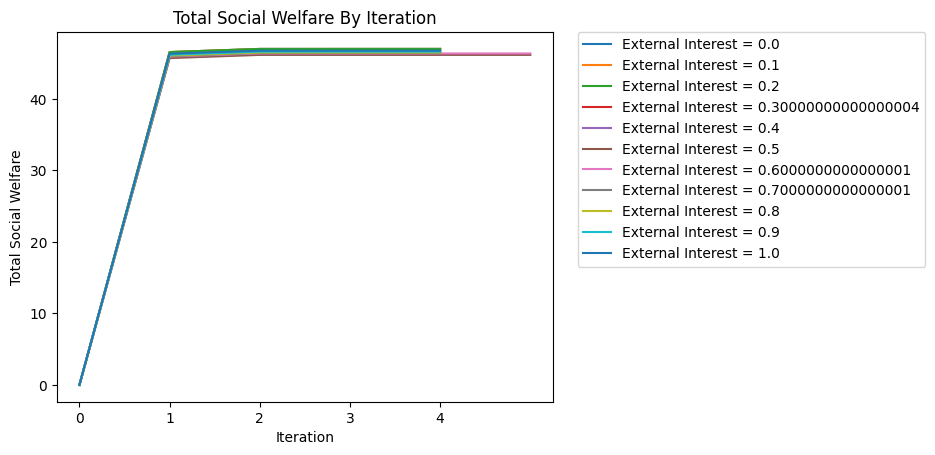

In [11]:
visualize.plot_value_by_iteration_by_test("Total Social Welfare By Iteration", stats['total_social_welfare'], tests[varied_param], varied_param_legend_label, 'Total Social Welfare')

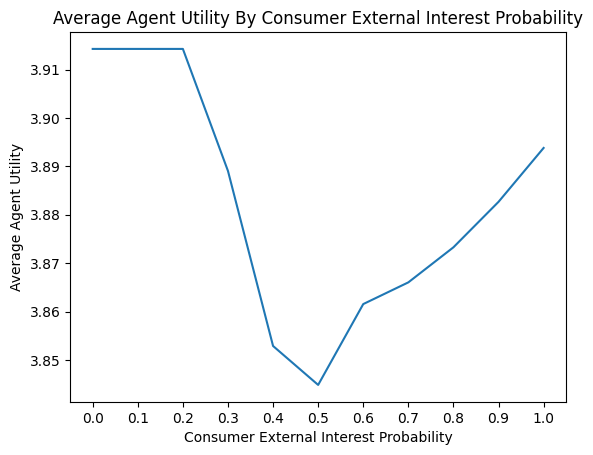

In [12]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", stats['average_agent_utilities'], tests[varied_param], varied_param_x_label, 'Average Agent Utility')

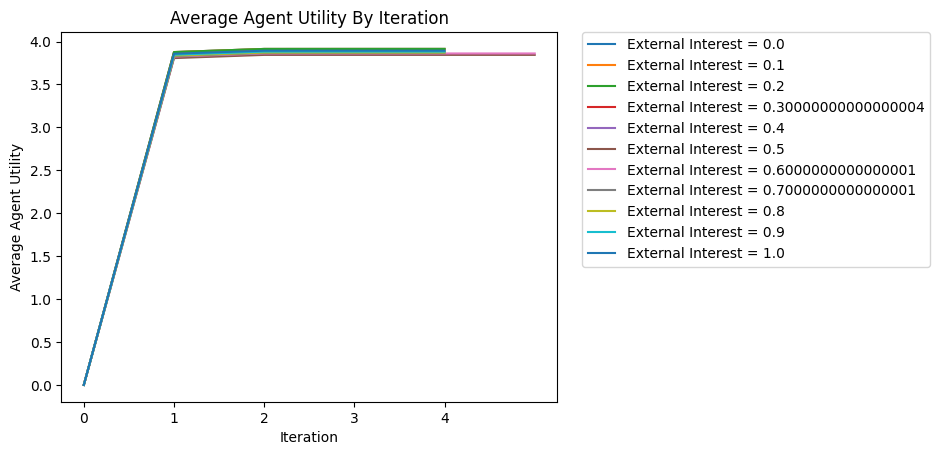

In [13]:
visualize.plot_value_by_iteration_by_test("Average Agent Utility By Iteration", stats['average_agent_utilities'], tests[varied_param], varied_param_legend_label, 'Average Agent Utility')

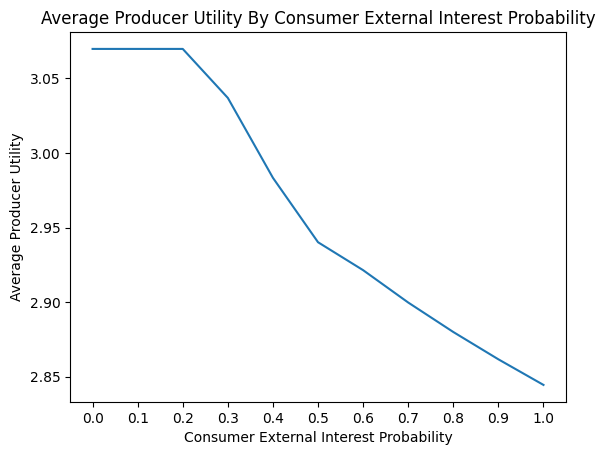

In [14]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", stats['average_producer_utilities'], tests[varied_param], varied_param_x_label, 'Average Producer Utility')

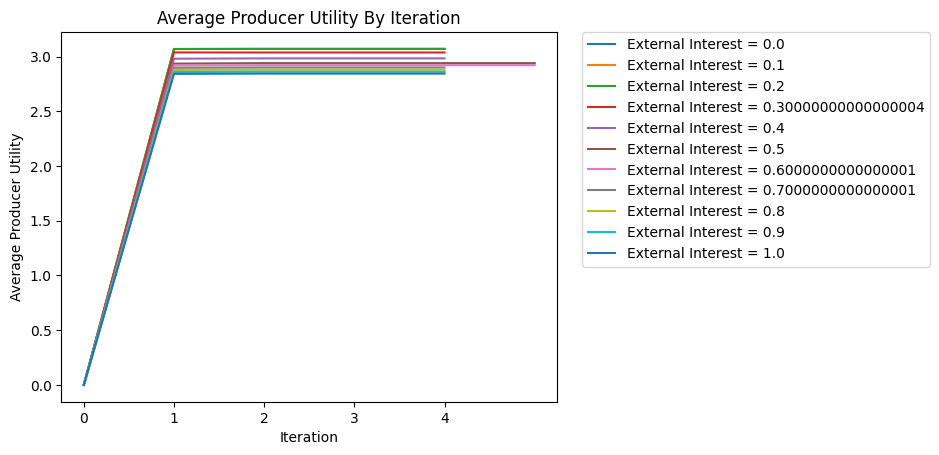

In [15]:
visualize.plot_value_by_iteration_by_test("Average Producer Utility By Iteration", stats['average_producer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Producer Utility')

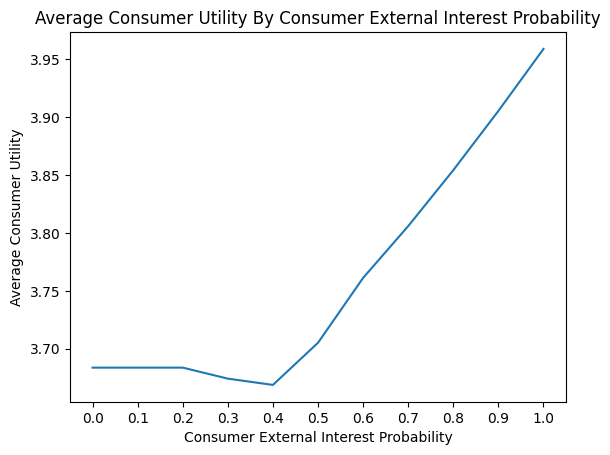

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", stats['average_consumer_utilities'], tests[varied_param], varied_param_x_label, 'Average Consumer Utility')

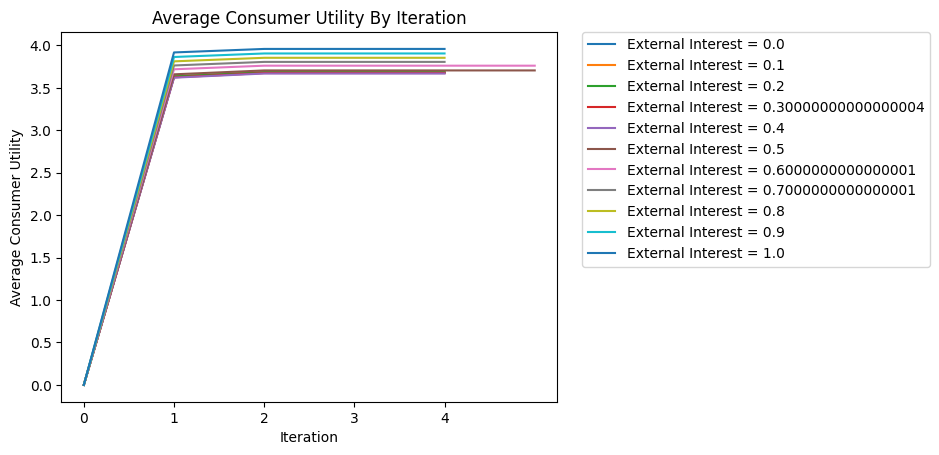

In [17]:
visualize.plot_value_by_iteration_by_test("Average Consumer Utility By Iteration", stats['average_consumer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Consumer Utility')

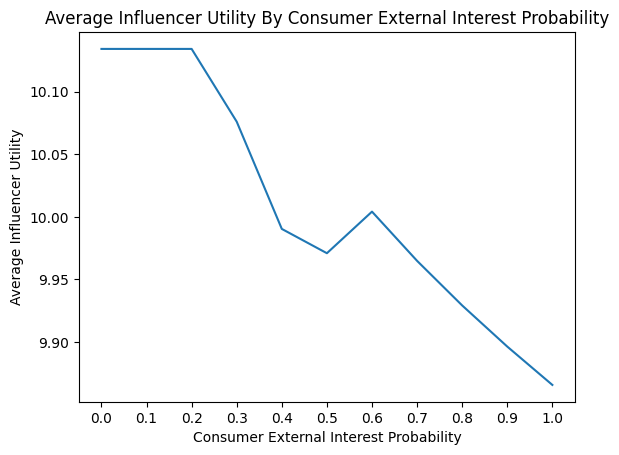

In [18]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", stats['average_influencer_utilities'], tests[varied_param], varied_param_x_label, 'Average Influencer Utility')

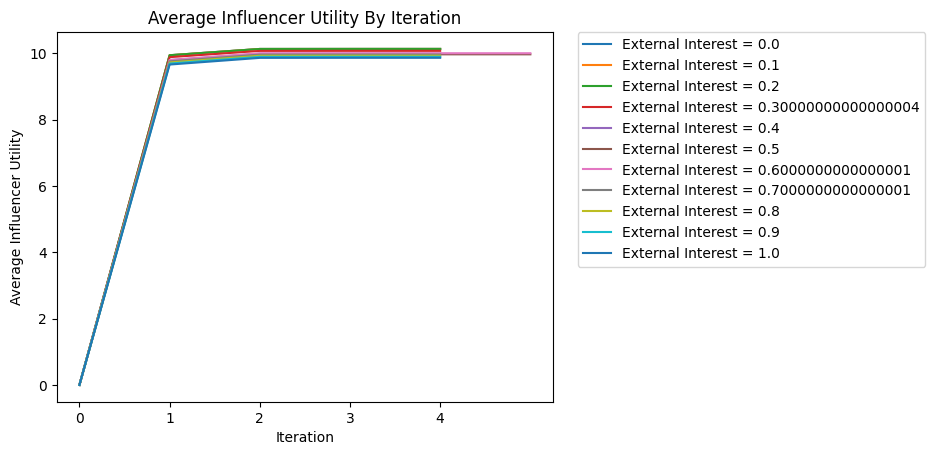

In [19]:
visualize.plot_value_by_iteration_by_test("Average Influencer Utility By Iteration", stats['average_influencer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Influencer Utility')

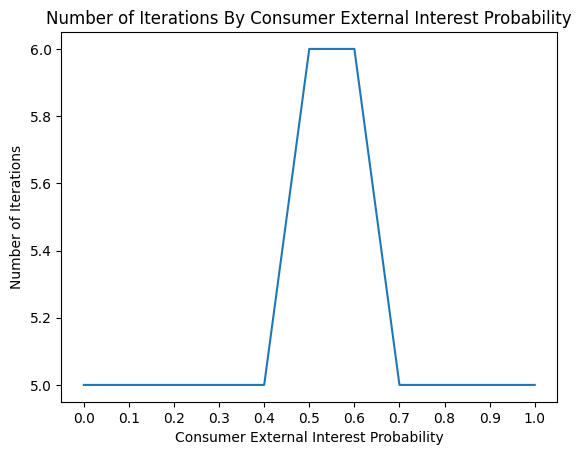

In [20]:
visualize.plot_ending_value_by_test(f"Number of Iterations By {varied_param_x_label}", stats['num_iterations'], tests[varied_param], varied_param_x_label, 'Number of Iterations')